# Clustering and PCA

### Mushroom Dataset

Podeis obtener el conjunto de datos en el siguiente enlace:

[Mushroom Dataset](https://www.kaggle.com/uciml/mushroom-classification)

Como podréis comprobar, hay muchas variables, todas ellas categóricas, por lo que exploraciones con scatterplot no nos serán útiles como en otros casos.

La variable a predecir ``class`` es binaria.


## Sección 0: Importaciones y configuraciones.

In [34]:
# Carga de librerías, las que hemos considerado básicas.
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA
from sklearn.preprocessing import OneHotEncoder
from sklearn.decomposition import PCA
from sklearn.ensemble import RandomForestClassifier
import os
from sklearn.cluster import KMeans

from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.metrics import homogeneity_score, completeness_score, v_measure_score, adjusted_rand_score

# Configuraciones de visualización (opcional, para mejorar apariencia de gráficos)
sns.set_theme(style="whitegrid")
plt.rcParams['figure.figsize'] = (10, 6) # Ajusta el tamaño por defecto de las figuras

## Sección 1: Carga y Exploración inicial de los datos

In [46]:
current_dir = os.getcwd() 
parent_dir = os.path.dirname(current_dir)
data_dir = os.path.join(parent_dir, "data")
file_path = os.path.join(data_dir, "")
csv_path = os.path.join(data_dir, "agaricus-lepiota.data")
df = pd.read_csv(csv_path)


In [47]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8123 entries, 0 to 8122
Data columns (total 23 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   p       8123 non-null   object
 1   x       8123 non-null   object
 2   s       8123 non-null   object
 3   n       8123 non-null   object
 4   t       8123 non-null   object
 5   p.1     8123 non-null   object
 6   f       8123 non-null   object
 7   c       8123 non-null   object
 8   n.1     8123 non-null   object
 9   k       8123 non-null   object
 10  e       8123 non-null   object
 11  e.1     8123 non-null   object
 12  s.1     8123 non-null   object
 13  s.2     8123 non-null   object
 14  w       8123 non-null   object
 15  w.1     8123 non-null   object
 16  p.2     8123 non-null   object
 17  w.2     8123 non-null   object
 18  o       8123 non-null   object
 19  p.3     8123 non-null   object
 20  k.1     8123 non-null   object
 21  s.3     8123 non-null   object
 22  u       8123 non-null   

<font color="e5b714">Vamos a renombrar las columnas como salen en la descripción del dataset, pero 'poisonous' vamos a renombrarla en 'class' , ya que vamos a clasificar en si es comestible o venenoso</font>

In [48]:
column_names = [
    'class', 'cap-shape', 'cap-surface', 'cap-color', 'bruises', 'odor',
    'gill-attachment', 'gill-spacing', 'gill-size', 'gill-color',
    'stalk-shape', 'stalk-root', 'stalk-surface-above-ring', 'stalk-surface-below-ring',
    'stalk-color-above-ring', 'stalk-color-below-ring', 'veil-type', 'veil-color',
    'ring-number', 'ring-type', 'spore-print-color', 'population', 'habitat'
]

df.columns = column_names


In [49]:
df.describe()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
count,8123,8123,8123,8123,8123,8123,8123,8123,8123,8123,...,8123,8123,8123,8123,8123,8123,8123,8123,8123,8123
unique,2,6,4,10,2,9,2,2,2,12,...,4,9,9,1,4,3,5,9,6,7
top,e,x,y,n,f,n,f,c,b,b,...,s,w,w,p,w,o,p,w,v,d
freq,4208,3655,3244,2283,4748,3528,7913,6811,5612,1728,...,4935,4463,4383,8123,7923,7487,3967,2388,4040,3148


In [50]:
df.columns = column_names
print("Descripción del DataFrame con tipos 'object':")
print(df.describe(include='object')) # Esta línea ya la tiene tu compañera

Descripción del DataFrame con tipos 'object':
       class cap-shape cap-surface cap-color bruises  odor gill-attachment  \
count   8123      8123        8123      8123    8123  8123            8123   
unique     2         6           4        10       2     9               2   
top        e         x           y         n       f     n               f   
freq    4208      3655        3244      2283    4748  3528            7913   

       gill-spacing gill-size gill-color  ... stalk-surface-below-ring  \
count          8123      8123       8123  ...                     8123   
unique            2         2         12  ...                        4   
top               c         b          b  ...                        s   
freq           6811      5612       1728  ...                     4935   

       stalk-color-above-ring stalk-color-below-ring veil-type veil-color  \
count                    8123                   8123      8123       8123   
unique                      9         

<font color="e5b714">Vemos las 5 primeras filas </font>

In [14]:
df.head(5)

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,e,x,s,y,t,a,f,c,b,k,...,s,w,w,p,w,o,p,n,n,g
1,e,b,s,w,t,l,f,c,b,n,...,s,w,w,p,w,o,p,n,n,m
2,p,x,y,w,t,p,f,c,n,n,...,s,w,w,p,w,o,p,k,s,u
3,e,x,s,g,f,n,f,w,b,k,...,s,w,w,p,w,o,e,n,a,g
4,e,x,y,y,t,a,f,c,b,n,...,s,w,w,p,w,o,p,k,n,g


## <font color="c6c6c6">**Exploración de datos** </font>


<font color="e5b714">Descripción Dataset: Este Dataset contiene 8124 instancias y 23 features con datos sobre diversas propiedades de los hongos, como su color, forma, olor y su hábitat, el objetivo es predecir si son comestibles o venenosas.

Todos los datos son categóricos, tipo object.</font>

**Calcular el número de nulos de cada feature**

In [51]:
df.isnull().sum()

class                       0
cap-shape                   0
cap-surface                 0
cap-color                   0
bruises                     0
odor                        0
gill-attachment             0
gill-spacing                0
gill-size                   0
gill-color                  0
stalk-shape                 0
stalk-root                  0
stalk-surface-above-ring    0
stalk-surface-below-ring    0
stalk-color-above-ring      0
stalk-color-below-ring      0
veil-type                   0
veil-color                  0
ring-number                 0
ring-type                   0
spore-print-color           0
population                  0
habitat                     0
dtype: int64

<font color="e5b714">No hay valores nulos aparentemente, pero en la descripción salía que podía haber '?' , así que vamos a comprobarlo:</font>

In [52]:

df.isin(['?']).sum()


class                          0
cap-shape                      0
cap-surface                    0
cap-color                      0
bruises                        0
odor                           0
gill-attachment                0
gill-spacing                   0
gill-size                      0
gill-color                     0
stalk-shape                    0
stalk-root                  2480
stalk-surface-above-ring       0
stalk-surface-below-ring       0
stalk-color-above-ring         0
stalk-color-below-ring         0
veil-type                      0
veil-color                     0
ring-number                    0
ring-type                      0
spore-print-color              0
population                     0
habitat                        0
dtype: int64


<font color="e5b714">Vemos que la columna stalk-root tiene 2480 valores ? , será mejor tratarlos como nulos.</font>

In [53]:
df.replace('?', pd.NA, inplace=True)


--- EDA: Distribución de la Clase Objetivo ---


C:\Users\Omar\AppData\Local\Temp\ipykernel_6688\1214469330.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='class', data=df, palette={'p': 'salmon', 'e': 'lightgreen'})


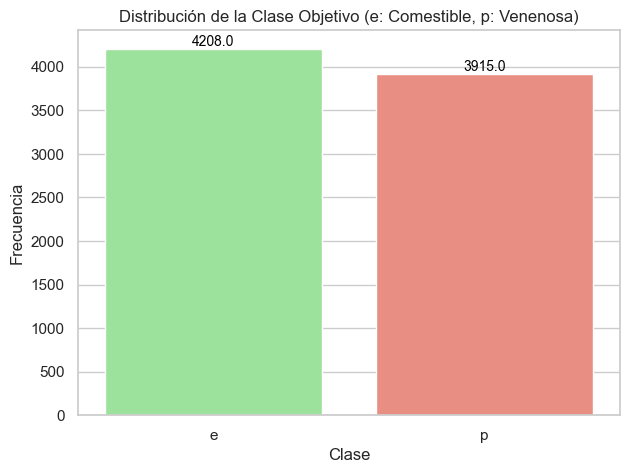


Conteo de valores para la variable 'class':
class
e    4208
p    3915
Name: count, dtype: int64
El dataset está relativamente balanceado en cuanto a la clase objetivo.


In [54]:
# Distribución de la clase objetivo
print("\n--- EDA: Distribución de la Clase Objetivo ---")
plt.figure(figsize=(7, 5)) # Ajuste de tamaño para este gráfico específico
sns.countplot(x='class', data=df, palette={'p': 'salmon', 'e': 'lightgreen'})
plt.title('Distribución de la Clase Objetivo (e: Comestible, p: Venenosa)')
plt.xlabel('Clase')
plt.ylabel('Frecuencia')
# Añadir etiquetas de conteo en las barras
ax = plt.gca()
for p_bar in ax.patches:
    ax.annotate(f'{p_bar.get_height()}', (p_bar.get_x() + p_bar.get_width() / 2., p_bar.get_height()),
                ha='center', va='center', fontsize=10, color='black', xytext=(0, 5),
                textcoords='offset points')
plt.show()

print("\nConteo de valores para la variable 'class':")
print(df['class'].value_counts())
print("El dataset está relativamente balanceado en cuanto a la clase objetivo.")

### Imputación de Valores Nulos en 'stalk-root'

La columna `stalk-root` presenta 2480 valores nulos (originalmente '?'). En lugar de eliminar estas filas (lo que implicaría perder una porción significativa del dataset, ~30.5%) o imputar con la moda (lo que podría introducir sesgos y ocultar información), se decide imputar estos valores nulos con una nueva categoría: `'unknow'`.

Esta estrategia permite:
1.  Conservar todas las instancias del dataset.
2.  Tratar la ausencia de información como una categoría más, permitiendo al modelo potencialmente aprender si esta "ausencia" es en sí misma una característica distintiva.

In [18]:
df.isnull().sum()

class                          0
cap-shape                      0
cap-surface                    0
cap-color                      0
bruises                        0
odor                           0
gill-attachment                0
gill-spacing                   0
gill-size                      0
gill-color                     0
stalk-shape                    0
stalk-root                  2480
stalk-surface-above-ring       0
stalk-surface-below-ring       0
stalk-color-above-ring         0
stalk-color-below-ring         0
veil-type                      0
veil-color                     0
ring-number                    0
ring-type                      0
spore-print-color              0
population                     0
habitat                        0
dtype: int64

**Buscar valores extraños. Para ello, ver los valores únicos en cada feature**

<font color="e5b714">Obtenemos un nuevo dataframe de dos columnas donde en la primera están las features (features) y en la otra los valores únicos
asociados (n_values)</font>

In [19]:
df_uniques = pd.DataFrame({
    'features': df.columns,
    'n_values': [df[col].unique().tolist() for col in df.columns]
})
print(df_uniques)

                    features                              n_values
0                      class                                [e, p]
1                  cap-shape                    [x, b, s, f, k, c]
2                cap-surface                          [s, y, f, g]
3                  cap-color        [y, w, g, n, e, p, b, u, c, r]
4                    bruises                                [t, f]
5                       odor           [a, l, p, n, f, c, y, s, m]
6            gill-attachment                                [f, a]
7               gill-spacing                                [c, w]
8                  gill-size                                [b, n]
9                 gill-color  [k, n, g, p, w, h, u, e, b, r, y, o]
10               stalk-shape                                [e, t]
11                stalk-root                    [c, e, b, r, <NA>]
12  stalk-surface-above-ring                          [s, f, k, y]
13  stalk-surface-below-ring                          [s, f, y


## <font color="#c6c6c6">**Tratar aquellos valores que entendamos que sean nulos** </font>

In [20]:

print(df['stalk-root'].value_counts(dropna=False))


stalk-root
b       3776
<NA>    2480
e       1119
c        556
r        192
Name: count, dtype: int64


<font color="e5b714">Conclusión: Vemos que la cantidad de nulos en stalk-root (tipo de raiz), es muy alto, pero no creo que la mejor opción sea imputarlo por la moda ya que corremos el riesgo de sesgar una cantidad grande de datos, podríamos crear una opción nueva como desconocido o faltante, porque tampoco soy partidaria de eliminarlos ya que me parecen relevantes porque es una característica morfológica de las setas que nos puede ayudar en la clasificación.</font>

In [21]:
df['stalk-root']=df['stalk-root'].fillna('unknow')
print(df['stalk-root'].unique())

['c' 'e' 'b' 'r' 'unknow']



## Sección 2: Preprocesamiento

In [22]:
counts_features = df.nunique()
print(counts_features)

class                        2
cap-shape                    6
cap-surface                  4
cap-color                   10
bruises                      2
odor                         9
gill-attachment              2
gill-spacing                 2
gill-size                    2
gill-color                  12
stalk-shape                  2
stalk-root                   5
stalk-surface-above-ring     4
stalk-surface-below-ring     4
stalk-color-above-ring       9
stalk-color-below-ring       9
veil-type                    1
veil-color                   4
ring-number                  3
ring-type                    5
spore-print-color            9
population                   6
habitat                      7
dtype: int64


<font color="e5b714">Conclusión: La variable veil-type tiene un solo valor, no nos va a aportar nada ya que siempre es igual, no estoy muy a favor de eliminar nada pero en este caso no aporta, así que procedemos a eliminarla.</font>

In [23]:
df = df.drop(columns=['veil-type'])

In [24]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8123 entries, 0 to 8122
Data columns (total 22 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   class                     8123 non-null   object
 1   cap-shape                 8123 non-null   object
 2   cap-surface               8123 non-null   object
 3   cap-color                 8123 non-null   object
 4   bruises                   8123 non-null   object
 5   odor                      8123 non-null   object
 6   gill-attachment           8123 non-null   object
 7   gill-spacing              8123 non-null   object
 8   gill-size                 8123 non-null   object
 9   gill-color                8123 non-null   object
 10  stalk-shape               8123 non-null   object
 11  stalk-root                8123 non-null   object
 12  stalk-surface-above-ring  8123 non-null   object
 13  stalk-surface-below-ring  8123 non-null   object
 14  stalk-color-above-ring  


#### <font color="#c6c6c6">**Separar entre variables predictoras y variables a predecir** </font>

In [25]:
# La variable que trata de predecir este conjunto de datos es 'class'.
X = df.drop(['class'], axis=1)
y = df['class']


#### <font color="c6c6c6">**Codificar correctamente las variables categóricas a numéricas** </font>

<font color="e5b714">Vamos a usar OneHotEncoder para asignarle un orden más óptimo y porque no tenemos demasiados valores únicos por variables, el máximo son 12, así que me parece viable usarlo.</font>

In [26]:
# One Hot Encoder (una linea).
X_encoded = OneHotEncoder(sparse_output=False).fit_transform(X)

### <font color="c6c6c6">**Train test split** </font>

In [27]:
# Os lo dejamos a todos igual
X_train, X_test, y_train, y_test = train_test_split(X_encoded, y, test_size=0.33, random_state=42)

## Sección 3: PCA (Análisis de Componentes Principales)

Es un conjunto de datos del que aún no hemos visto nada (no tenemos graficas) así que vamos a hacer algunas. Tenemos el problema de que son muchas variables, **PCA al rescate**: le pedimos que nos de dos dimensiones y las pintamos, sabemos que serán **aquellas que retengan más información**.

<font color="e5b714">PCA es una forma de resumir muchos datos sin perder mucha información, es decir transforma los datos originales en un nuevo conjunto de componentes que resumen la mayor parte de la información (varianza) de los datos en menos dimensiones.</font>

In [28]:
pca =  PCA(n_components=2)
pca.fit(X_train)

PCA(n_components=2)

In [29]:
X_train_pca=pca.transform(X_train)
print(X_train_pca)

[[-0.89804909  2.60381372]
 [ 1.43613726  0.21345338]
 [ 0.46751351 -0.60728239]
 ...
 [ 1.51381282 -0.23257086]
 [-0.22236912  0.34224571]
 [ 0.58557492 -0.59524381]]


### <font color="#00304E">**Representar en un scatterplot y poner en color las etiquetas de entrenamiento** </font>



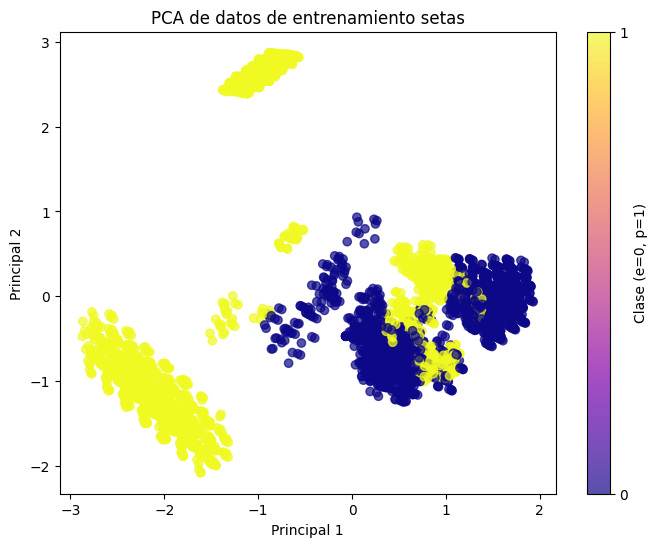

In [30]:
plt.figure(figsize=(8, 6))
scatter = plt.scatter(X_train_pca[:, 0], X_train_pca[:, 1], c=y_train.map({'e':0, 'p':1}), cmap='plasma', alpha=0.7)
plt.xlabel('Principal 1')
plt.ylabel('Principal 2')
plt.title('PCA de datos de entrenamiento setas')
plt.colorbar(scatter, ticks=[0, 1], label='Clase (e=0, p=1)')
plt.show()

<font color="e5b714">Resumen scatterplot: el color amarillo(1) representa a que es venenosa y el color azul(0) representa a las comestibles,se ven manchas separadas, aunque no perfectamente separadas, hay zonas dominadas por las manchas amarillas, y hay zonas mezcladas</font>

In [57]:
X_test_pca = pca.transform(X_test)

### Varianza Explicada por PCA
Es fundamental entender cuánta de la varianza original de los datos es capturada por los componentes principales seleccionados. Esto nos ayuda a justificar la reducción de dimensionalidad y a decidir un número óptimo de componentes si el objetivo fuera, por ejemplo, alimentar otro modelo.


--- PCA: Análisis de Varianza Explicada ---
Varianza explicada por el 1er componente: 0.1688
Varianza explicada por el 2do componente: 0.1375
Varianza acumulada por los 2 primeros componentes: 0.3063
Número de componentes para explicar al menos el 95% de la varianza: 40
Varianza total explicada por estos 40 componentes: 0.9504


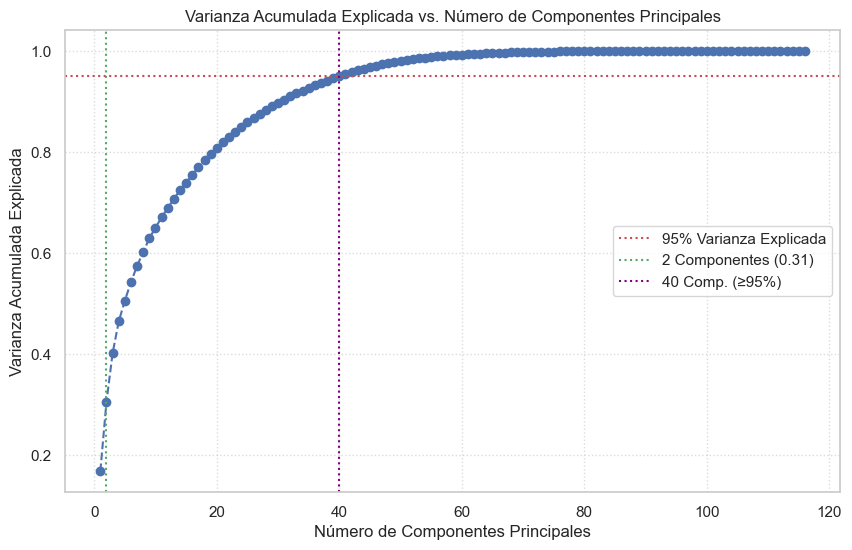

In [66]:
print("\n--- PCA: Análisis de Varianza Explicada ---")

# Para analizar la varianza explicada por todos los componentes posibles,
# ajustamos un nuevo PCA sin especificar n_components (o n_components=None).
# Asegurarse de que X_train es el dataset codificado (OneHotEncoded) antes de PCA.
pca_para_varianza = PCA(n_components=None, random_state=42)
pca_para_varianza.fit(X_train) # X_train es el OneHotEncoded

# Varianza explicada por cada componente
explained_variance_ratio_individual = pca_para_varianza.explained_variance_ratio_
# Varianza explicada acumulada
cumulative_explained_variance = np.cumsum(explained_variance_ratio_individual)

print(f"Varianza explicada por el 1er componente: {explained_variance_ratio_individual[0]:.4f}")
if len(explained_variance_ratio_individual) > 1:
    print(f"Varianza explicada por el 2do componente: {explained_variance_ratio_individual[1]:.4f}")
    print(f"Varianza acumulada por los 2 primeros componentes: {cumulative_explained_variance[1]:.4f}")

# Encontrar cuántos componentes se necesitan para explicar, por ejemplo, el 95% de la varianza
components_95_var = np.argmax(cumulative_explained_variance >= 0.95) + 1
print(f"Número de componentes para explicar al menos el 95% de la varianza: {components_95_var}")
print(f"Varianza total explicada por estos {components_95_var} componentes: {cumulative_explained_variance[components_95_var-1]:.4f}")

# Graficar la varianza explicada acumulada
plt.figure(figsize=(10, 6))
plt.plot(range(1, len(cumulative_explained_variance) + 1), cumulative_explained_variance, marker='o', linestyle='--', color='b')
plt.title('Varianza Acumulada Explicada vs. Número de Componentes Principales')
plt.xlabel('Número de Componentes Principales')
plt.ylabel('Varianza Acumulada Explicada')
plt.grid(True, linestyle=':', alpha=0.7)

# Líneas de referencia
plt.axhline(y=0.95, color='r', linestyle=':', label='95% Varianza Explicada')
if len(cumulative_explained_variance) > 1:
    plt.axvline(x=2, color='g', linestyle=':', label=f'2 Componentes ({cumulative_explained_variance[1]:.2f})')
plt.axvline(x=components_95_var, color='purple', linestyle=':', label=f'{components_95_var} Comp. (≥95%)')

plt.legend(loc='center right')
plt.show()

Parece que está bastante separadito, parece que a ojo mucho se puede ver :)

## Sección 4: Clasificación Supervisada (Random Forest)

Clasificación Supervisada con Random Forest (Para Fines Comparativos)

Aunque el foco principal de este taller es el aprendizaje no supervisado (PCA y K-Means), incluimos un modelo de clasificación supervisada (Random Forest) por varias razones:

**Establecer un Benchmark:** Para entender qué tan bien se pueden predecir las clases ('comestible' vs 'venenosa') cuando se utilizan las etiquetas. Esto nos da un rendimiento "objetivo".
**Evaluar el Impacto de PCA:** Podemos entrenar el Random Forest tanto en los datos originales (codificados) como en los datos reducidos por PCA, para ver cómo la reducción de dimensionalidad afecta la capacidad de clasificación.
**Contextualizar el Clustering:** Los resultados del Random Forest nos ayudan a apreciar qué tan "separables" son las clases. Si son muy separables, podríamos esperar que K-Means también encuentre clusters que se alineen bien con estas clases.


<font color="#c6c6c6">**Igualmente, vamos a entrenar un clasificador a ver qué tal lo hace antes de editar más** </font>

In [67]:
# 1. Definir el clasificador y el número de estimadores
classifier = RandomForestClassifier(n_estimators=50, random_state=42)

In [69]:
# 2. Entrenar en train
classifier.fit(X_train_pca, y_train)
# classifier.fit(X_train, y_train)

RandomForestClassifier(n_estimators=50, random_state=42)

In [70]:
# 3. Calcular la precisión sobre test
y_pred = classifier.predict(X_test_pca)
accuracy = accuracy_score(y_test, y_pred)
print(f"Precisión en el conjunto de prueba: {accuracy}")
# y_pred = classifier.predict(X_test)
# accuracy = accuracy_score(y_test, y_pred)
# print(f"Precisión en el conjunto de prueba: {accuracy}")

Precisión en el conjunto de prueba: 0.9615814994405073



--- 4.2 Random Forest CON PCA (2 Componentes) ---
Precisión del Random Forest (CON PCA - 2 Componentes): 0.9620

Matriz de Confusión (CON PCA - 2 Componentes):


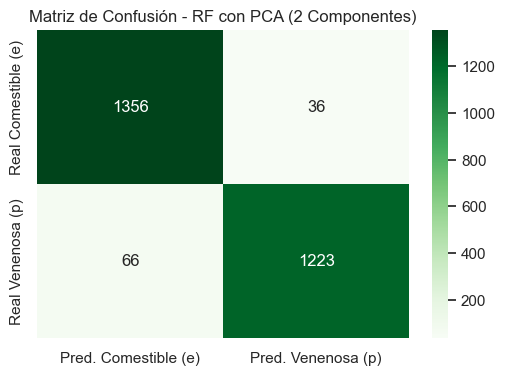


Reporte de Clasificación (CON PCA - 2 Componentes):
                precision    recall  f1-score   support

Comestible (e)       0.95      0.97      0.96      1392
  Venenosa (p)       0.97      0.95      0.96      1289

      accuracy                           0.96      2681
     macro avg       0.96      0.96      0.96      2681
  weighted avg       0.96      0.96      0.96      2681


Comentario: Con solo 2 componentes principales, el Random Forest aún puede lograr una buena precisión,
lo que demuestra que estos dos componentes capturan mucha de la información relevante para la clasificación.


In [74]:
print("\n--- 4.2 Random Forest CON PCA (2 Componentes) ---")

rf_pca_2_comp = RandomForestClassifier(n_estimators=100, random_state=42, n_jobs=-1)
rf_pca_2_comp.fit(X_train_pca, y_train)  # Usar X_train_pca ya definido
y_pred_pca_2_comp = rf_pca_2_comp.predict(X_test_pca)  # Usar X_test_pca ya definido
accuracy_pca_2_comp = accuracy_score(y_test, y_pred_pca_2_comp)

print(f"Precisión del Random Forest (CON PCA - 2 Componentes): {accuracy_pca_2_comp:.4f}")

print("\nMatriz de Confusión (CON PCA - 2 Componentes):")
cm_pca_2_comp = confusion_matrix(y_test, y_pred_pca_2_comp, labels=['e', 'p'])
plt.figure(figsize=(6,4))
sns.heatmap(cm_pca_2_comp, annot=True, fmt='d', cmap='Greens',
            xticklabels=['Pred. Comestible (e)', 'Pred. Venenosa (p)'],
            yticklabels=['Real Comestible (e)', 'Real Venenosa (p)'])
plt.title('Matriz de Confusión - RF con PCA (2 Componentes)')
plt.show()

print("\nReporte de Clasificación (CON PCA - 2 Componentes):")
print(classification_report(y_test, y_pred_pca_2_comp, target_names=['Comestible (e)', 'Venenosa (p)']))

print("\nComentario: Con solo 2 componentes principales, el Random Forest aún puede lograr una buena precisión,")
print("lo que demuestra que estos dos componentes capturan mucha de la información relevante para la clasificación.")

<font color="e5b714">Resumen: hemos entrenado con los datos ya aplicando el PCA, nos da una precisión del 96,16% lo que es bastante buena, aunque también hemos probado y dejamos comentada la prueba sin el PCA aplicado y el accuracy es bastante perfecto, un 100%.</font>

Es un conjunto sencillo y Random Forest es muy bueno en su trabajo, Igualmente, vamos a ver qué tamaño tenemos de dataset:


In [75]:
#X_train_pca.shape
X_train.shape

(5442, 116)

<font color="e5b714">Como ya hemos aplicado el PCA nos salen simplemente 2 dimensiones, que es lo que nos pedían, sin aplicar el PCA, nos saldrían 116, que son muchísimas columnas, así que vamos a probar con diferentes números de componentes, como nos piden, para ver el efecto en la precisión.</font>

¿Muchas features no? Vamos a reducir las usando PCA.

<font color="e5b714">Volvemos a definir PCA pero ya dentro del bucle con todos los pasos que nos piden, definimos un rango para que empiece desde el 1 y vaya de 10 en 10, para que vaya probando.</font>

Entrenando con 1 componentes principales...
Precisión con 1 componentes: 0.8859
Entrenando con 11 componentes principales...
Precisión con 11 componentes: 1.0000
Entrenando con 21 componentes principales...
Precisión con 21 componentes: 1.0000
Entrenando con 31 componentes principales...
Precisión con 31 componentes: 1.0000
Entrenando con 41 componentes principales...
Precisión con 41 componentes: 1.0000
Entrenando con 51 componentes principales...
Precisión con 51 componentes: 1.0000
Entrenando con 61 componentes principales...
Precisión con 61 componentes: 1.0000
Entrenando con 71 componentes principales...
Precisión con 71 componentes: 1.0000
Entrenando con 81 componentes principales...
Precisión con 81 componentes: 1.0000
Entrenando con 91 componentes principales...
Precisión con 91 componentes: 1.0000
Entrenando con 101 componentes principales...
Precisión con 101 componentes: 1.0000
Entrenando con 111 componentes principales...
Precisión con 111 componentes: 1.0000


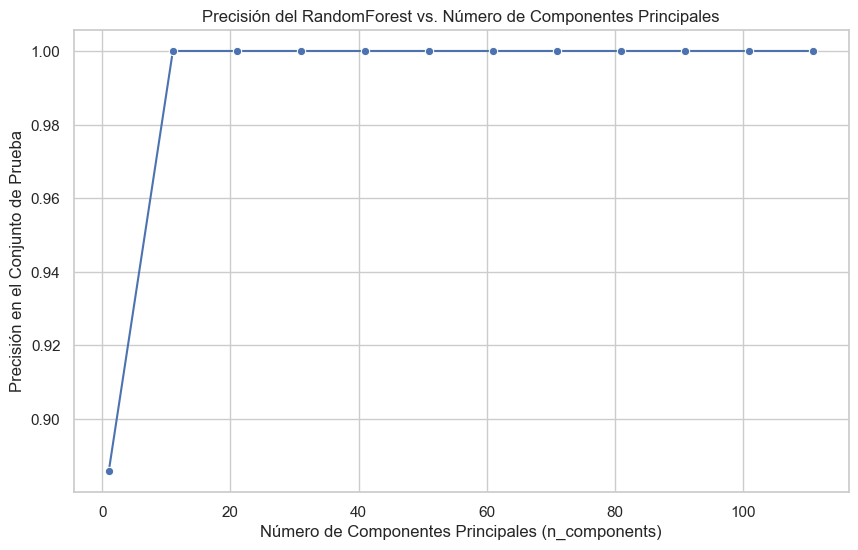

In [76]:
n_features = range(1, X_train.shape[1] + 1, 10)
scores = []

for n in n_features:
    print(f"Entrenando con {n} componentes principales...")

    # Hacer PCA sobre X_train
    # 1. Definir PCA
    pca = PCA(n, random_state=42)
    # 2. Aprender PCA sobre X_train y transformar los datos de entrenamiento y prueba
    X_train_pca = pca.fit_transform(X_train)
    X_test_pca = pca.transform(X_test)

    # Entrenar Random Forest
    # 1. Definir el RF
    classifier = RandomForestClassifier(n_estimators=100, random_state=42)
    # 2. Entrenar clasificador
    classifier.fit(X_train_pca, y_train)

    # Realizar predicciones en el conjunto de prueba
    y_pred = classifier.predict(X_test_pca)

    # Calcular la precisión y guardarla
    accuracy = accuracy_score(y_test, y_pred)
    scores.append(accuracy)
    print(f"Precisión con {n} componentes: {accuracy:.4f}")

# Visualizar los resultados
plt.figure(figsize=(10, 6))
sns.lineplot(x=list(n_features), y=scores, marker='o')
plt.xlabel('Número de Componentes Principales (n_components)')
plt.ylabel('Precisión en el Conjunto de Prueba')
plt.title('Precisión del RandomForest vs. Número de Componentes Principales')
plt.grid(True)
plt.show()

Vale, estamos viendo que a partir de unas 10 features ya tenemos el score que queríamos y además hemos reducido las variables a un 10% de las que teníamos, incluso menos que las variables originales.

<font color="e5b714">Como dice en el texto, a partir de 11 el modelo RandomForest ya alcanaza el score perfecto, de 100%, es decir sólo necesitamos 11 para recoger toda la información relevante para nuestra clasificación. </font>

In [77]:
pca = PCA(n_components=11)
pca.fit(X_train)
print(pca.components_)

[[ 2.82030076e-02 -9.43003427e-05  1.19732070e-02 ... -1.00370609e-01
   1.86398229e-02  3.27161260e-03]
 [-8.57215997e-03 -1.38458398e-04  4.60234993e-02 ...  4.34290799e-02
  -9.01952831e-03 -1.18983489e-02]
 [-5.07423091e-02 -3.92268546e-04  7.22440892e-02 ...  1.60979863e-02
  -1.76837483e-02 -8.50640109e-03]
 ...
 [ 1.94044855e-02 -1.47598580e-03 -1.67842130e-01 ...  3.75596925e-02
  -2.34609209e-02  3.89863497e-02]
 [ 3.85465442e-02 -6.91545000e-04  1.23899518e-02 ...  4.11586563e-02
  -7.11980801e-03 -1.65815922e-02]
 [ 6.54982363e-02 -3.70694242e-04  1.37758996e-02 ...  3.18358747e-02
  -5.53862157e-02 -3.17085973e-02]]


In [78]:
component_1 = pca.components_[0]
top_features = np.argsort(np.abs(component_1))[::-1][:5]
print(top_features)

[ 93  20  21  37 101]


In [79]:

X_encoded = OneHotEncoder(sparse_output=False)
X_encoded.fit(X)

# Queremos ver cuáles son las variables más influyentes
feature_names = X_encoded.get_feature_names_out(X.columns)

for idx in top_features:
    print(feature_names[idx])

ring-type_p
bruises_f
bruises_t
gill-color_b
spore-print-color_w


## Sección 5: Clustering con K-Means

Viendo que el conjunto de datos es sencillito, podemos intentar hacer algo de clustering a ver qué información podemos obtener.

El primer paso va a ser importar la función de Kmeans de sklearn, y a partir de ahi, vamos a buscar el valor óptimo de clusters. Como hemos visto anteriormente, este valor lo obtenemos, por ejemplo, del codo de la gráfica que representa el total de las distancias de los puntos a los centros de los clusters asociados. Os dejo la página de la documentación de sklearn para que lo busquéis:

[K-Means on sklearn](https://scikit-learn.org/stable/modules/generated/sklearn.cluster.KMeans.html)

Con esto solo hay que ahora generar los modelos de kmeans, evaluar y pintar la gráfica para los valores de ``k`` que establezcais.




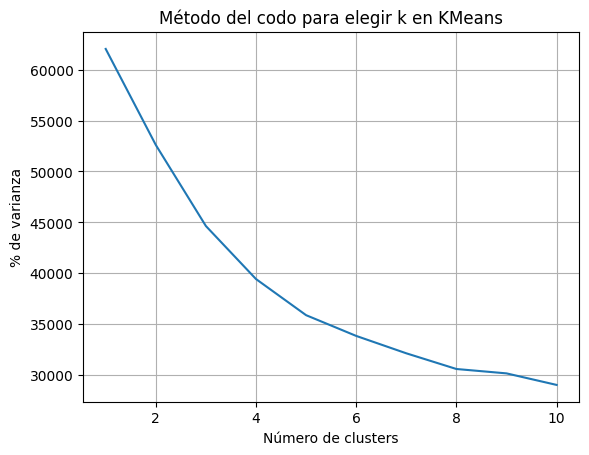

In [46]:
scores = []
k_values = range(1, 11)
for a in k_values:
    kmeans = KMeans(n_clusters=a, random_state=42, n_init=10)
    kmeans.fit(X_train)
    scores.append(kmeans.inertia_)

sns.lineplot(x=k_values, y=scores, markers='o')
plt.title('Método del codo para elegir k en KMeans')
plt.xlabel('Número de clusters')
plt.ylabel('% de varianza')
plt.grid(True)
plt.show()


--- 5.1 K-Means: Método del Codo para determinar k ---


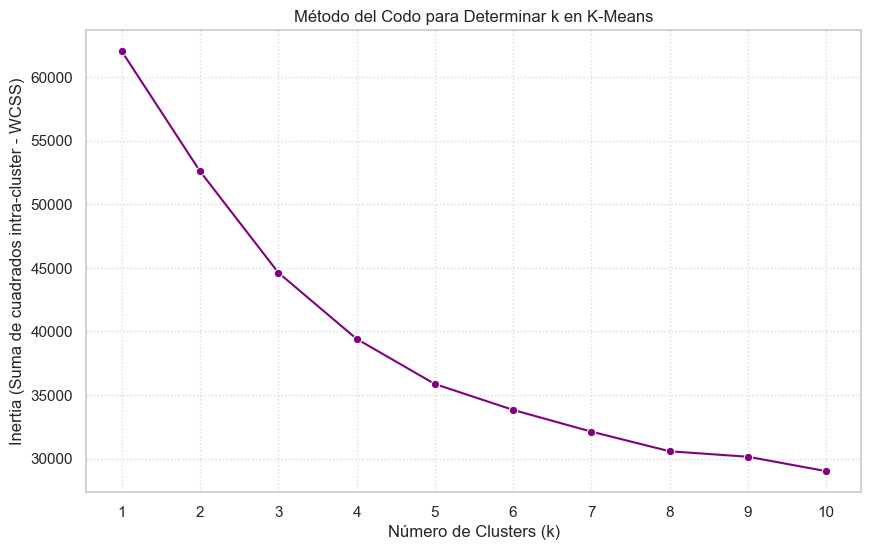

La 'Inertia' o WCSS representa la suma de las distancias al cuadrado de cada punto a su centroide más cercano.
Buscamos un 'codo' en el gráfico: un punto donde añadir más clusters ya no disminuye significativamente la inercia.
Se procederá con k=4 clusters (valor usado por la compañera).


In [80]:
print("\n--- 5.1 K-Means: Método del Codo para determinar k ---")
# El código de tu compañera para el rango de k_values y el bucle.
# Asumimos X_train (OHE) es el input para KMeans aquí.
# k_values = range(1, 11)
# inertia_scores = []
# for k_val in k_values:
#    kmeans_elbow = KMeans(n_clusters=k_val, random_state=42, n_init=10, algorithm='lloyd') # 'lloyd' o 'elkan'
#    kmeans_elbow.fit(X_train) # Ajustar sobre los datos OHE completos
#    inertia_scores.append(kmeans_elbow.inertia_)

# Reutilizar 'scores' y 'k_values' de la compañera si existen con esos nombres.
# El código original usa 'scores' y 'a' en el bucle para k_values. Adaptamos a 'inertia_scores' y 'k_val' por claridad.

k_values_elbow = range(1, 11) # O el rango que usó tu compañera
inertia_values = []
for k_run in k_values_elbow:
    kmeans_temp = KMeans(n_clusters=k_run, random_state=42, n_init=10, algorithm='lloyd')
    kmeans_temp.fit(X_train) # Usar X_train (datos OHE completos) para el codo
    inertia_values.append(kmeans_temp.inertia_)

plt.figure(figsize=(10, 6))
sns.lineplot(x=list(k_values_elbow), y=inertia_values, marker='o', color='purple')
plt.title('Método del Codo para Determinar k en K-Means')
plt.xlabel('Número de Clusters (k)')
plt.ylabel('Inertia (Suma de cuadrados intra-cluster - WCSS)') # ETIQUETA CORREGIDA
plt.xticks(list(k_values_elbow))
plt.grid(True, linestyle=':', alpha=0.7)
plt.show()

print("La 'Inertia' o WCSS representa la suma de las distancias al cuadrado de cada punto a su centroide más cercano.")
print("Buscamos un 'codo' en el gráfico: un punto donde añadir más clusters ya no disminuye significativamente la inercia.")
# Se debe elegir un valor de k (OPTIMAL_K) basado en este gráfico.
# Tu compañera usó k=4, lo mantendremos para consistencia, pero el gráfico podría sugerir otro valor.
OPTIMAL_K = 4
print(f"Se procederá con k={OPTIMAL_K} clusters (valor usado por la compañera).")

<font color="e5b714">Resumen: Yo creo que el 'codo' está en el 4 aproximadamente, luego empieza a aplanarse.</font>

Con el valor que hayáis obtenido de la gráfica, podéis obtener una buena aproximación de Kmeans y con ello podemos pasar a explorar cómo de bien han separado la información los distintos clusters. Para ello, se va a hacer un ``catplot``, seaborn os lo hará solito. Con esto lo que se pretende ver es la distribución de la varaible a predecir en función del cluster que haya determinado Kmeans.

In [34]:
# Aprender Kmeans con el valor de K obtenido.

kmeans = KMeans(n_clusters=4, random_state=42, n_init=10)
clusters = kmeans.fit_predict(X_train)

In [35]:
# Preparar el catplot.
df_clusters = pd.DataFrame({
    'cluster': clusters,
    'class': y_train.values
})

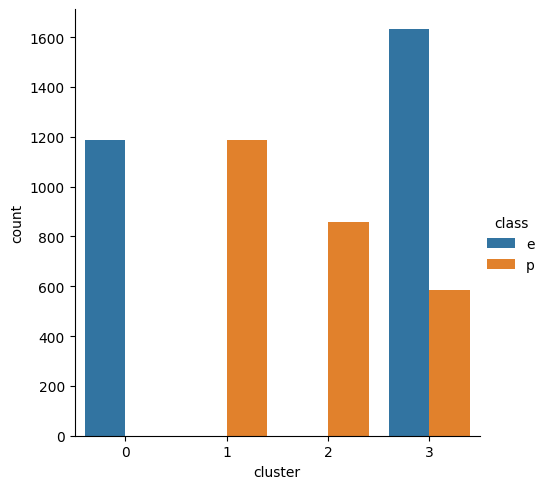

In [36]:
# Pintar.
ax = sns.catplot(x='cluster', hue='class', data=df_clusters, kind='count')

Vamos a ver qué tal queda esto pintado. Para ello, repetimos el scatterplot de antes pero usando como color el cluster asignado por kmeans.

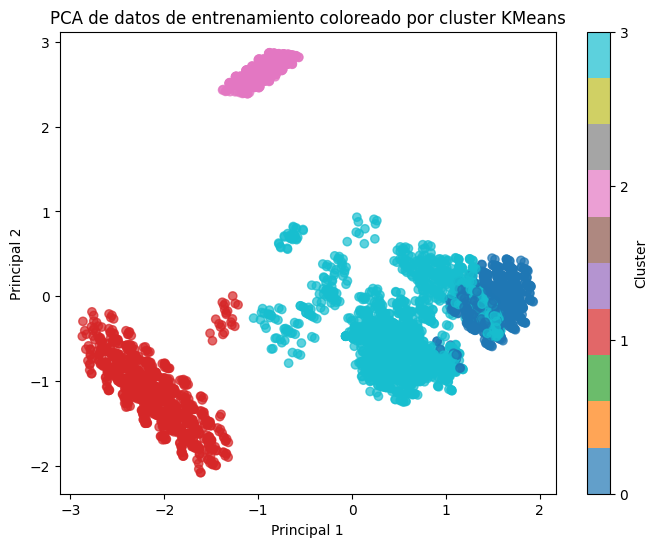

In [37]:
plt.figure(figsize=(8, 6))
scatter = plt.scatter(X_train_pca[:, 0], X_train_pca[:, 1], c=clusters, cmap='tab10', alpha=0.7)
plt.xlabel('Principal 1')
plt.ylabel('Principal 2')
plt.title('PCA de datos de entrenamiento coloreado por cluster KMeans')
plt.colorbar(scatter, ticks=range(4), label='Cluster')
plt.show()

¿Es bastante parecido no? No es tan bueno como el Random Forest, pero ha conseguido identificar bastante bien los distintos puntos del dataset sin utilizar las etiquetas. De hecho, el diagrama de factor que hemos visto antes muestra que solo un par de clusters son imprecisos. Si no hubieramos tenido etiquetas esta aproximacion nos hubiera ayudado mucho a clasificar los distintos tipos de hongos.

<font color="e5b714">Resumen: KMeans ha conseguido separar bastante bien los puntos, aunque es mejor RandomForest, si no tuviéramos las etiquetas nos serviría mucho.</font>

## Sección 6:  Reducción de Dimensionalidad con t-SNE


--- 6. (Opcional) Visualización con t-SNE ---
Preparando una muestra de 1632 puntos para t-SNE...
Dimensiones de la muestra para t-SNE: X=(1632, 116), y=(1632,)
Ajustando t-SNE (esto puede tardar unos minutos)...


c:\Users\Omar\Desktop\trabajo\repositorios\Nhoeli-Omar-mushroom-uml-training\.venv\Lib\site-packages\sklearn\manifold\_t_sne.py:1164: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.5 and will be removed in 1.7.
  warnings.warn(


Ajuste de t-SNE completado.


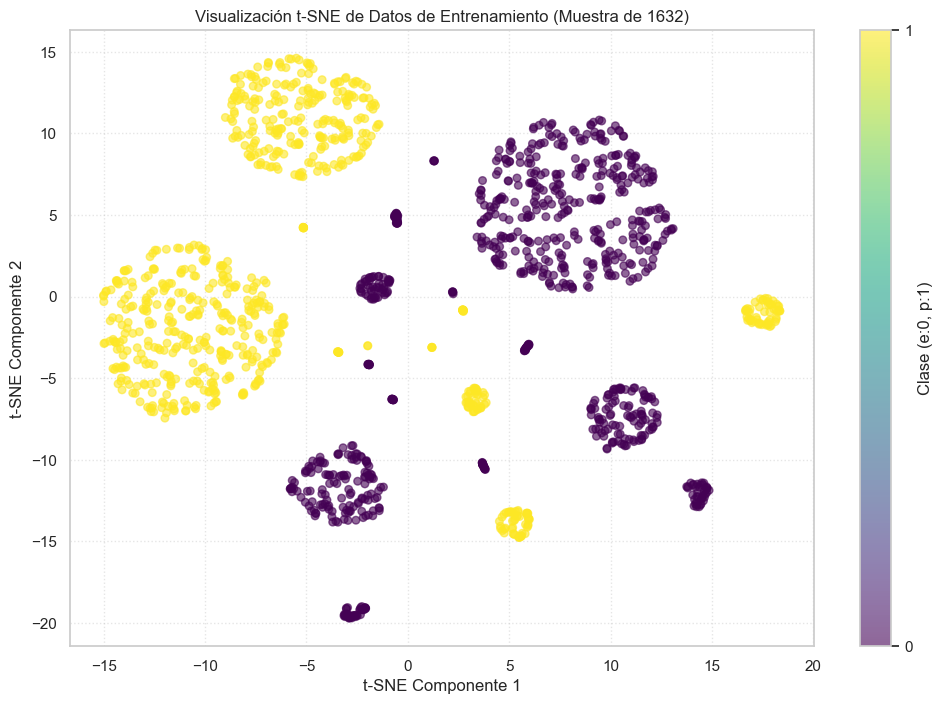


Comentario sobre la visualización t-SNE:
t-SNE a menudo revela agrupaciones (clusters) más definidas visualmente que PCA porque optimiza
para preservar las similitudes locales. Sin embargo, el tamaño relativo de los clusters y las distancias
entre ellos en un gráfico t-SNE no siempre son directamente interpretables en términos de densidad o separación real.


In [81]:
print("\n--- 6. (Opcional) Visualización con t-SNE ---")

# t-SNE puede ser lento. Considerar una muestra de X_train (OHE) y y_train.
# Asegurarse que X_train (OHE) y y_train están disponibles.
sample_fraction = 0.3 # Tomar el 30% de los datos para t-SNE, o un número fijo.
n_samples_for_tsne = int(X_train.shape[0] * sample_fraction)
if n_samples_for_tsne < 500: # Asegurar un mínimo razonable si el dataset es pequeño
    n_samples_for_tsne = min(X_train.shape[0], 1000) # ej. mínimo 1000 o todo el dataset

print(f"Preparando una muestra de {n_samples_for_tsne} puntos para t-SNE...")
if X_train.shape[0] > n_samples_for_tsne:
    # np.random.seed(42) # Para reproducibilidad de la muestra
    random_indices = np.random.choice(X_train.shape[0], size=n_samples_for_tsne, replace=False)
    X_train_sample_tsne = X_train[random_indices, :]
    y_train_sample_tsne = y_train.iloc[random_indices]
else:
    X_train_sample_tsne = X_train
    y_train_sample_tsne = y_train

print(f"Dimensiones de la muestra para t-SNE: X={X_train_sample_tsne.shape}, y={y_train_sample_tsne.shape}")

# Inicializar y ajustar t-SNE
# Perplexity suele estar entre 5 y 50. n_iter puede necesitar ser > 250.
# init='pca' puede ayudar a la inicialización. learning_rate='auto' es una buena heurística.
tsne_model = TSNE(n_components=2, random_state=42, perplexity=30, n_iter=350, init='pca', learning_rate='auto')
print("Ajustando t-SNE (esto puede tardar unos minutos)...")
X_train_tsne_transformed = tsne_model.fit_transform(X_train_sample_tsne)
print("Ajuste de t-SNE completado.")

# Visualizar los resultados de t-SNE
plt.figure(figsize=(12, 8))
scatter_tsne = plt.scatter(
    X_train_tsne_transformed[:, 0],
    X_train_tsne_transformed[:, 1],
    c=y_train_sample_tsne.map({'e': 0, 'p': 1}), # Mapear etiquetas para colores
    cmap='viridis', # Usar un mapa de color diferente para distinguirlo de PCA
    alpha=0.6,
    s=30 # Tamaño de los puntos
)

plt.title(f'Visualización t-SNE de Datos de Entrenamiento (Muestra de {n_samples_for_tsne})')
plt.xlabel('t-SNE Componente 1')
plt.ylabel('t-SNE Componente 2')
plt.colorbar(scatter_tsne, ticks=[0, 1], label='Clase (e:0, p:1)')
plt.grid(True, linestyle=':', alpha=0.5)
plt.show()

print("\nComentario sobre la visualización t-SNE:")
print("t-SNE a menudo revela agrupaciones (clusters) más definidas visualmente que PCA porque optimiza")
print("para preservar las similitudes locales. Sin embargo, el tamaño relativo de los clusters y las distancias")
print("entre ellos en un gráfico t-SNE no siempre son directamente interpretables en términos de densidad o separación real.")